#### Yizhou Yao <br>DSC478 <br>HW2 <br>Due:5/3/2020


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### Problem 1

#### a) Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function.

In [554]:
# load data
train = pd.read_table("trainMatrixModified.txt", header=None)
train_lab = pd.read_table("trainClasses.txt", header=None, index_col=0)
test = pd.read_table("testMatrixModified.txt", header=None)
test_lab = pd.read_table("testClasses.txt", header=None, index_col=0)

In [555]:
# transform data into matrices and arrays
DT_train = np.array(train.T)
DT_test = np.array(test.T)
train_lab = np.array(train_lab).flatten()
test_lab = np.array(test_lab).flatten()

In [556]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    return count.most_common(1)[0][0]

#### b) Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances) 

In [557]:
def evaluate_knn(testSet, trainSet, K, trainLab, measure, testLab):
    correct = 0
    for i in range(0, len(testSet)):
        predLab = knn_classify(testSet[i], trainSet, K, trainLab, measure)
        if predLab == testLab[i]:
            correct += 1
    accuracy = correct/len(testSet)
    return accuracy

#### c) Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Eculidean distance version vs. cosine similarity version).

In [18]:
# euclidean: measure = 0
# cosine: measure = 1
euc_accuracy = []
cos_accuracy = []
for K in range(5, 101, 5):
    euc_accuracy.append(evaluate_knn(DT_test, DT_train, K, train_lab, 0, test_lab))

for K in range(5, 101, 5):
    cos_accuracy.append(evaluate_knn(DT_test, DT_train, K, train_lab, 1, test_lab))    

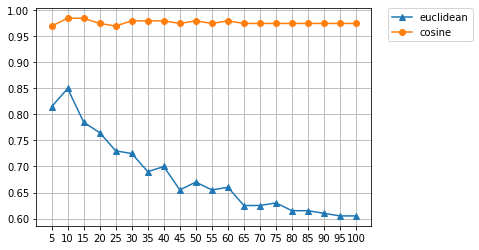

In [553]:
Krange = np.arange(5, 101, 5)
plt.plot(Krange, euc_accuracy, label = "euclidean", marker="^")
plt.plot(Krange, cos_accuracy, label = "cosine", marker="o")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(np.arange(5, 101, 5))
plt.grid()
plt.show()

#### d) Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). Then, rerun your evaluation (only for the Cosine similairty version of the classifier) on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [552]:
DF = pd.DataFrame([(train != 0).sum(axis = 1)]).T
NMatrix=np.ones(np.shape(train), dtype=float)*800
IDF = np.log2(np.divide(NMatrix, np.array(DF)))
train_tfidf = np.array((train * IDF).T)
test_tfidf = np.array((test * IDF[:, :200]).T)

In [532]:
Krange = np.arange(5, 101, 5)
cos_accuracy2 = []
for K in range(5, 101, 5):
    cos_accuracy2.append(evaluate_knn(test_tfidf, train_tfidf, K, train_lab, 1, test_lab))

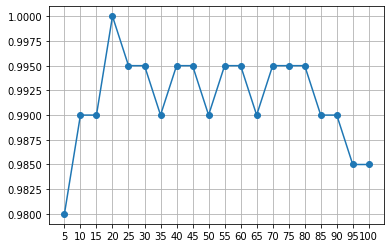

In [551]:
plt.plot(Krange, cos_accuracy2, label = "cosine", marker="o")
plt.xticks(Krange)
plt.grid()
plt.show()

#### e) Create a new classifier based on the Rocchio Method adapted for text categorization. You should separate the training function from the classifiation function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes.  Finally, use your evaluation function to compare your results to the best KNN results you obtained in part d. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario.]


In [ ]:
def Rochio_train(train, train_lab):
    prototypeDict = {}
    for i in train_lab:
        if len(prototypeDict) == 0:
            prototype[i] = train[i]
        else:
            prototypeDict[i] += train[i]
    return prototypeDict

def Rochio_classifier(x, D):
    D_norm = np.array([np.linalg.norm(D.get(i)) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    sims = np.dot(D,x)/(D_norm * x_norm)
    dists = 1 - sims
    return pred_lab, sims

def Rochio_evaluate(test, test_lab, prototype):
    
    return accuracy

800

### Problem 2
#### a) Load and preprocess the data using Pandas or similar tools. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (i.e., convert categorical attributes into numeric by creating dummy variables). Finally, split the transformed data into training and test sets (using 80%-20% randomized split).

In [580]:
# load
bank = pd.read_csv("bank_data.csv")
bank = bank.set_index("id", drop=True)
bank_target = bank.pep
bank = bank.drop(columns=["pep"])
bank = pd.get_dummies(bank)
bank

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.00,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
ID12102,40,30085.10,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
ID12103,51,16575.40,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12104,23,20375.40,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
ID12105,57,50576.30,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID12696,61,47025.00,2,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
ID12697,30,9672.25,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12698,31,15976.30,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0


In [581]:
# split into 80% train 20% test
from sklearn.model_selection import train_test_split
bk_train, bk_test, bk_target_train, bk_target_test = train_test_split(bank, bank_target, test_size=0.2, random_state=33)

#### b) Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [582]:
from sklearn import preprocessing
from sklearn import neighbors, tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as plt

In [583]:
# min-max normalize
min_max_scaler = preprocessing.MinMaxScaler().fit(bk_train)

bk_train_norm = min_max_scaler.transform(bk_train)
bk_train_norm = pd.DataFrame(bk_train_norm, columns=bk_train.columns, index=bk_train.index)

bk_test_norm = min_max_scaler.transform(bk_test)
bk_test_norm = pd.DataFrame(bk_test_norm, columns=bk_test.columns, index=bk_test.index)

In [584]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf = knnclf.fit(bk_train_norm, bk_target_train)

In [585]:
knnpreds_test = knnclf.predict(bk_test_norm)

In [587]:
knncm = confusion_matrix(bk_target_test, knnpreds_test)
print(knncm)

[[48 18]
 [23 31]]


In [588]:
print(classification_report(bk_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.68      0.73      0.70        66
         YES       0.63      0.57      0.60        54

    accuracy                           0.66       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.66      0.66      0.66       120



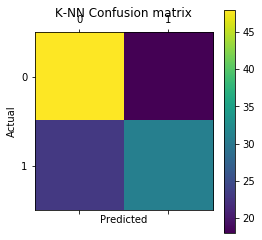

In [589]:
%matplotlib inline
plt.matshow(knncm)
plt.title('K-NN Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### I see the best result when n_neighbors=5 and weights="distance". Generally, when weights="uniform" I see poorer accuracy. When n_neighbors gets larger and smaller from 5, the accuracy decreases.

#### c) Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). As above, generate the confusion matrix, classification report, and average accuracy scores the classifier. Compare the average accuracy score on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [590]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(bk_train, bk_target_train)
treepreds_test = treeclf.predict(bk_test)

In [592]:
print(classification_report(bk_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.84      0.85      0.84        66
         YES       0.81      0.80      0.80        54

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.82      0.82      0.82       120



[[56 10]
 [11 43]]


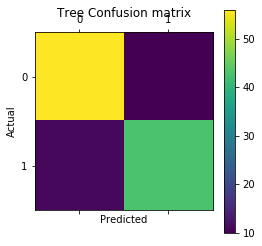

In [593]:
treecm = confusion_matrix(bk_target_test, treepreds_test)
print(treecm)
%matplotlib inline
plt.matshow(treecm)
plt.title('Tree Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Average accuracy on test set:

In [594]:
print(treeclf.score(bk_test, bk_target_test))

0.825


Average accuracy on train set:

In [595]:
print(treeclf.score(bk_train, bk_target_train))

1.0


### The decision tree model contains high variance and low bias because the avearge accuracy score for train set is equal to 1 and higher than the test set (0.825). That also suggests there may be overfitting issue in the model.

#### d) Create another decision tree model (trained on the non-normalized training data) using "entropy" as the selection criteria, min_samples_split=10, and max_depth=5. For this model generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

In [596]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [597]:
treeclf2 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=10, max_depth=5)
treeclf2 = treeclf2.fit(bk_train, bk_target_train)

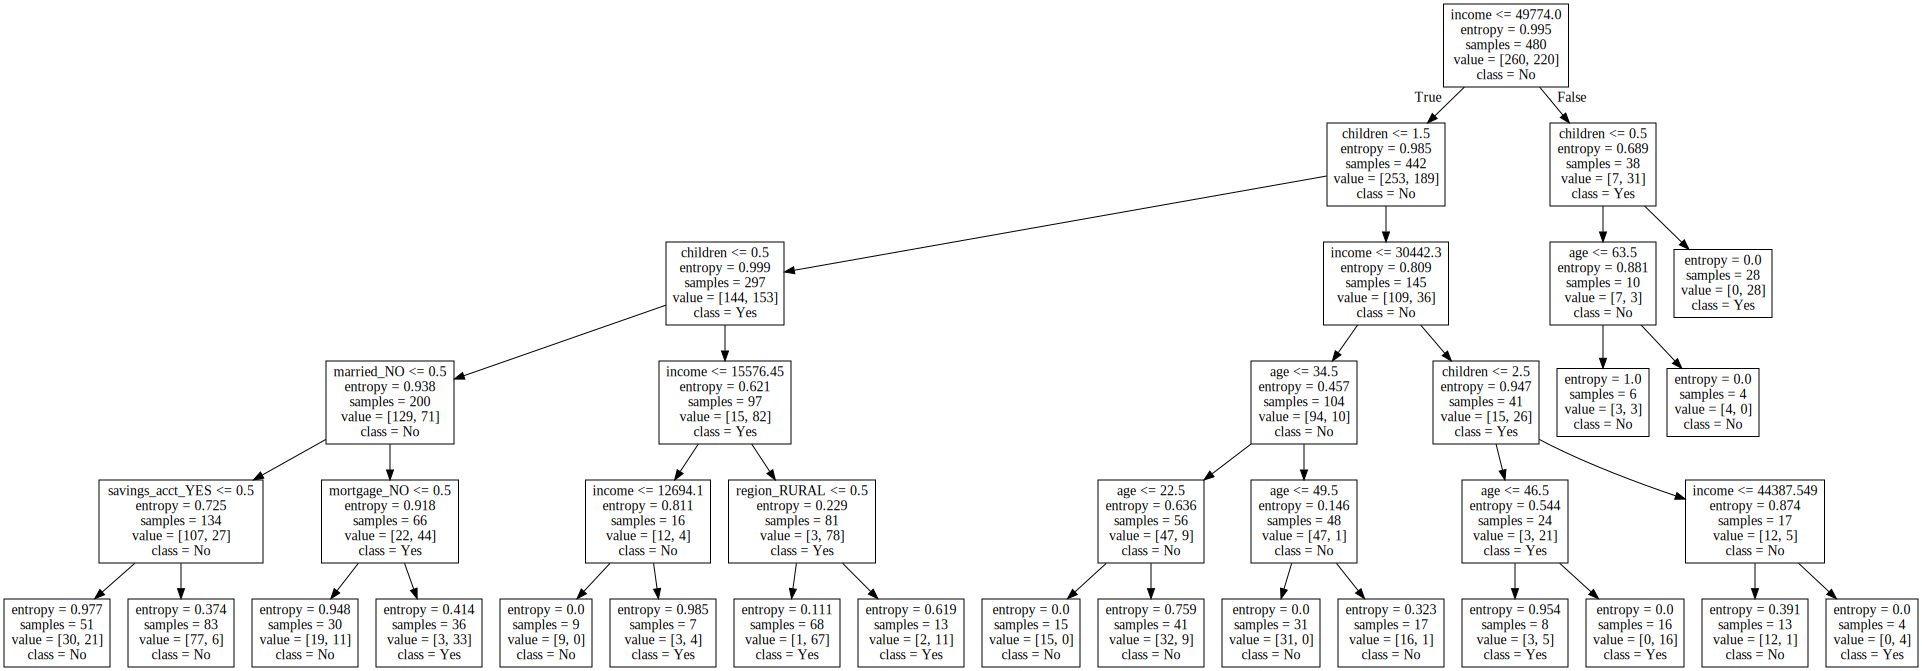

In [598]:
tree_graph = export_graphviz(treeclf2, out_file="tree.dot", feature_names=bk_train.columns, class_names=['No','Yes'])
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format="png")

In [599]:
system(dot -Tpng tree.dot -o dtree.png)

[]

### Problem 3
#### a) 
#### 1. Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

In [600]:
adult = pd.read_csv("adult-modified.csv", na_values=["?"])

In [601]:
print(adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
age               9802 non-null float64
workclass         9412 non-null object
education         10000 non-null int64
marital-status    10000 non-null object
race              10000 non-null object
sex               10000 non-null object
hours-per-week    10000 non-null int64
income            10000 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB
None


In [602]:
age_mean = adult.age.mean()
adult.age.fillna(age_mean, axis=0, inplace=True)
adult.dropna(inplace=True)
adult.reset_index(drop=True, inplace=True)
adult

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.000000,Public,13,Single,White,Male,40,<=50K
1,50.000000,Self-emp,13,Married,White,Male,13,<=50K
2,38.000000,Private,9,Single,White,Male,40,<=50K
3,53.000000,Private,7,Married,Black,Male,40,<=50K
4,28.000000,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9407,38.000000,Private,10,Married,White,Male,60,>50K
9408,25.000000,Private,9,Single,White,Female,8,<=50K
9409,21.000000,Private,10,Single,Black,Male,40,<=50K
9410,38.449806,Private,2,Married,White,Male,53,<=50K


#### 2. Examine the characteristics of the attributes, includingsummary statistics for the attributea, histograms illustrating the distribtions of numeric attributes, and bar graphs showing value counts for categorical attributes.

In [603]:
adult.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.366342,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962039,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


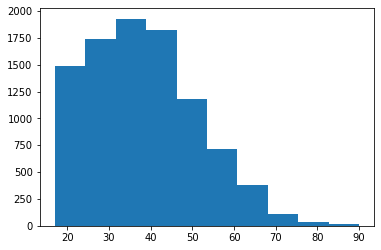

In [604]:
plt.hist(adult.age)
plt.show()

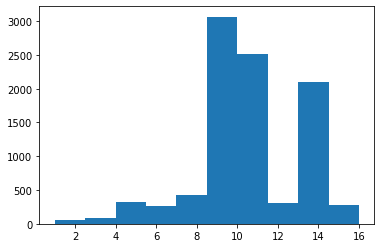

In [605]:
plt.hist(adult.education)
plt.show()

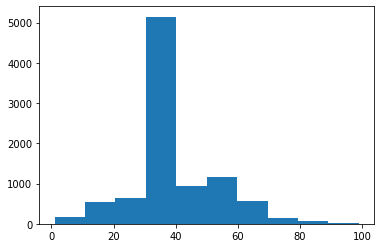

In [606]:
plt.hist(adult["hours-per-week"])
plt.show()

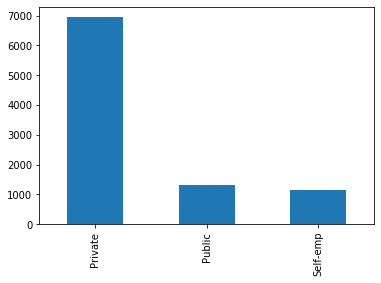

In [607]:
adult["workclass"].value_counts().plot(kind='bar')
plt.show()

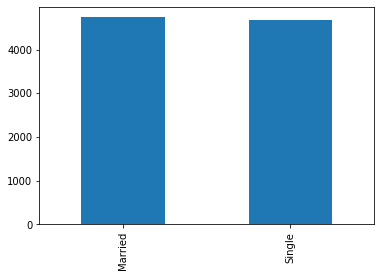

In [608]:
adult["marital-status"].value_counts().plot(kind='bar')
plt.show()

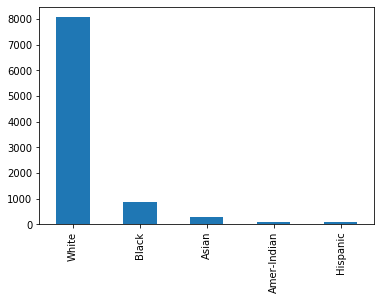

In [609]:
adult["race"].value_counts().plot(kind='bar')
plt.show()

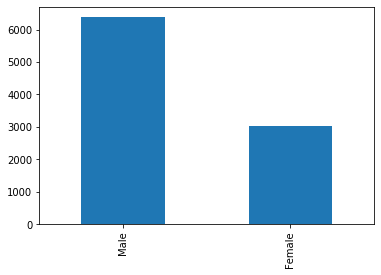

In [610]:
adult["sex"].value_counts().plot(kind='bar')
plt.show()

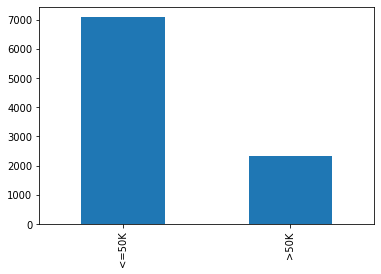

In [611]:
adult["income"].value_counts().plot(kind='bar')
plt.show()

#### 3. Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

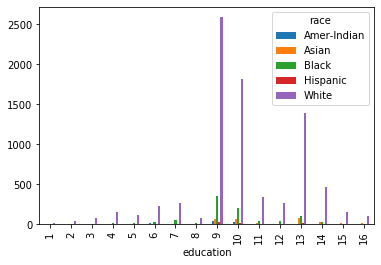

In [612]:
eXr = pd.crosstab(adult["education"], adult["race"])
plt.show(eXr.plot(kind="bar"))

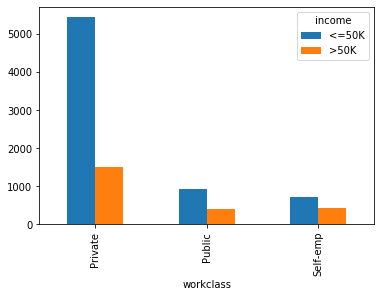

In [613]:
wXi = pd.crosstab(adult["workclass"], adult["income"])
plt.show(wXi.plot(kind="bar"))

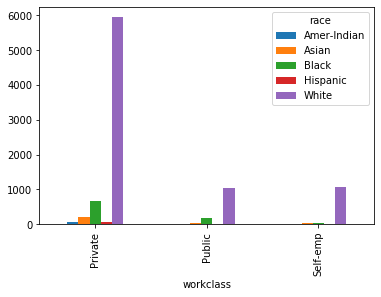

In [366]:
wXr = pd.crosstab(adult["workclass"], adult["race"])
plt.show(wXr.plot(kind="bar"))

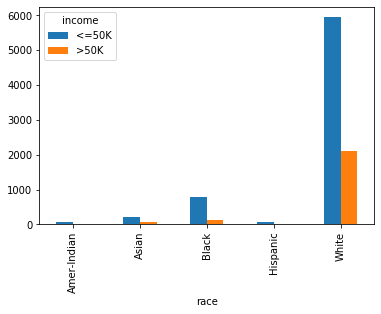

In [614]:
rXi = pd.crosstab(adult["race"], adult["income"])
plt.show(rXi.plot(kind="bar"))

In [615]:
rXi["percent_in_low_income"] = rXi["<=50K"]/(rXi["<=50K"]+rXi[">50K"])
rXi.sort_values("percent_in_low_income", ascending=False)

income,<=50K,>50K,percent_in_low_income
race,,,
Hispanic,69,6,0.920000
Amer-Indian,83,9,0.902174
Black,773,119,0.866592
Asian,224,67,0.769759
White,5944,2118,0.737286


### Observations:
### In education vs race barplot, white people have most raw counts in every year of education and this is due to the demographic fact that white is the largest racial group in the US. In income vs workclass plot, low-income population is larger than high-income population for every work class and the difference is most obvious in the private workclass. In the race vs workclass plot, there are more white people in every workclass with the most differnce exist in private workclass. In income vs race plot, there are more low-income population than high-income population for all races. In the last table, Hispanic and Amer-Indian have the high percentages of population in low income, followed by Black, Asian and White correspondingly.

#### 4. Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

In [616]:
low_income = adult[adult.income == "<=50K"]
high_income = adult[adult.income == ">50K"]

Low-income attribute info:

In [617]:
low_income.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,7093.000000,7093,7093.000000,7093,7093,7093,7093.000000,7093
unique,NaN,3,NaN,2,5,2,NaN,1
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,5443,NaN,4363,5944,4424,NaN,7093
mean,36.644604,NaN,9.646976,NaN,NaN,NaN,39.567038,NaN
std,13.340142,NaN,2.397358,NaN,NaN,NaN,11.868506,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,26.000000,NaN,9.000000,NaN,NaN,NaN,38.000000,NaN
50%,35.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
75%,45.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN


High-income attributes info:

In [618]:
high_income.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,2319.000000,2319,2319.000000,2319,2319,2319,2319.000000,2319
unique,NaN,3,NaN,2,5,2,NaN,1
top,NaN,Private,NaN,Married,White,Male,NaN,>50K
freq,NaN,1504,NaN,2007,2118,1959,NaN,2319
mean,43.632531,NaN,11.588185,NaN,NaN,NaN,45.708495,NaN
std,10.042135,NaN,2.410764,NaN,NaN,NaN,10.678794,NaN
min,19.000000,NaN,2.000000,NaN,NaN,NaN,1.000000,NaN
25%,36.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,43.000000,NaN,12.000000,NaN,NaN,NaN,40.000000,NaN
75%,50.000000,NaN,13.000000,NaN,NaN,NaN,50.000000,NaN


### Comparison:
### The mean age in high-income population is about 10 years more than the age of low-income. Mean education of high-income is higher than mean education of low-income by about 2 units. High-income population has higher percentage of Married status while low-income has higher percentage of Single. High-income's hours-per-week is 6 hours higher than the low-income.

#### b)
#### 1. Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps). Split the data into training and test sets (80%-20% split).

In [619]:
adult = pd.get_dummies(adult)

In [620]:
adult_lab = adult["income_>50K"]

In [621]:
adult_dat = adult.drop(columns=["income_>50K", "income_<=50K"])
adult_dat

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.000000,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.000000,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.000000,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.000000,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.000000,13,40,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,38.000000,10,60,1,0,0,1,0,0,0,0,0,1,0,1
9408,25.000000,9,8,1,0,0,0,1,0,0,0,0,1,1,0
9409,21.000000,10,40,1,0,0,0,1,0,0,1,0,0,0,1
9410,38.449806,2,53,1,0,0,1,0,0,0,0,0,1,0,1


#### 2. Use scikit-learn to build classifiers usinng Naive Bayes (Gaussian), decision tree (using "gini" as selection criteria), and linear discriminant analysis (LDA).  For each of these perform 10-fold cross-validation on the training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this to the model accuracy on the training data. Finally, run your model on the set-aside test data.

In [622]:
adult_train, adult_test, adult_train_lab, adult_test_lab = train_test_split(adult_dat,
                                                                         adult_lab, test_size=0.2, random_state=33)

#### Gaussian Naive Bayes model:

In [623]:
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(adult_train, adult_train_lab)

In [624]:
from sklearn.model_selection import cross_val_score
cv_scores1 = cross_val_score(nbclf, adult_dat, adult_lab, cv=10)
print(cv_scores1)

[0.72823779 0.70488323 0.73142251 0.70456961 0.73326249 0.70669501
 0.7120085  0.7183847  0.73113709 0.70744681]


In [625]:
print("Naive Bayes Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores1.mean(), cv_scores1.std() * 2))
print()
print("Accuracy on training data: {}".format(nbclf.score(adult_train, adult_train_lab)))
print()
print("Accuracy on test data for: {}".format(nbclf.score(adult_test, adult_test_lab)))

Naive Bayes Overall Accuracy: 0.72 (+/- 0.02)

Accuracy on training data: 0.720547217425953

Accuracy on test data for: 0.7190653212958046


#### Decision Tree model:

In [626]:
treeclf_adult = tree.DecisionTreeClassifier(criterion="gini")
treeclf_adult = treeclf_adult.fit(adult_train, adult_train_lab)

In [627]:
cv_scores2 = cross_val_score(treeclf_adult, adult_dat, adult_lab, cv=10)
print(cv_scores2)

[0.75159236 0.77176221 0.77282378 0.77364506 0.77470776 0.77151966
 0.74920298 0.78002125 0.77364506 0.76489362]


In [628]:
print("Decision Tree Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores2.mean(), cv_scores2.std() * 2))
print()
print("Accuracy on training data for Decision Tree: {}".format(treeclf_adult.score(adult_train, adult_train_lab)))
print()
print("Accuracy on test data for Decision Tree: {}".format(treeclf_adult.score(adult_test, adult_test_lab)))

Decision Tree Overall Accuracy: 0.77 (+/- 0.02)

Accuracy on training data for Decision Tree: 0.942887501660247

Accuracy on test data for Decision Tree: 0.7721720658523632


#### Linear Discriminant Analysis model:

In [629]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(adult_train, adult_train_lab)

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [630]:
cv_scores3 = cross_val_score(ldclf, adult_dat, adult_lab, cv=10)
print(cv_scores3)

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Victor\

[0.81210191 0.80997877 0.79193206 0.81721573 0.80977683 0.78958555
 0.79914984 0.80871413 0.82040383 0.81702128]


C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [631]:
print("LDA Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores3.mean(), cv_scores3.std() * 2))
print()
print("Accuracy on training data for LDA: {}".format(ldclf.score(adult_train, adult_train_lab)))
print()
print("Accuracy on test data for LDA: {}".format(ldclf.score(adult_test, adult_test_lab)))

LDA Overall Accuracy: 0.81 (+/- 0.02)

Accuracy on training data for LDA: 0.8063487846991633

Accuracy on test data for LDA: 0.8109399893786511


#### Comparison:
#### The 3 types of accuracies are approximately compatile for Naive Bayes and LDA. For Decision Tree, the accuracy score for training set is very high, while the overall accuracy and the accuracy for test set is similarly low.